<a href="https://colab.research.google.com/github/SarahMcCoy/DRL-Inventory-Management/blob/main/DRL_Inventory_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

DataCo = 'DataCoSupplyChainDataset.csv'

Data = pd.read_csv(DataCo, encoding='latin1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,2/3/18 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/18 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/18 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/18 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/18 11:24,Standard Class


In [ ]:
Data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161127 entries, 0 to 161126
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           161127 non-null  object 
 1   Days for shipping (real)       161127 non-null  int64  
 2   Days for shipment (scheduled)  161127 non-null  int64  
 3   Benefit per order              161127 non-null  float64
 4   Sales per customer             161127 non-null  float64
 5   Delivery Status                161127 non-null  object 
 6   Late_delivery_risk             161127 non-null  int64  
 7   Category Id                    161127 non-null  int64  
 8   Category Name                  161127 non-null  object 
 9   Customer City                  161127 non-null  object 
 10  Customer Country               161127 non-null  object 
 11  Customer Email                 161127 non-null  object 
 12  Customer Fname                

# Cleaning

In [ ]:
# drop irrelevant columns to analysis like product description
Data.drop(columns=['Product Description'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# imput unknown where values are missing in customer name column
Data['Customer Lname'].fillna('Unknown', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-543ab18141aa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Customer Lname'].fillna('Unknown', inplace=True)


In [ ]:
# imput 00000 where customer zipcode is missing
Data['Customer Zipcode'].fillna(Data['Customer Zipcode'].mode()[0], inplace=True)

<ipython-input-13-ebc9cb9dfb2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Customer Zipcode'].fillna(Data['Customer Zipcode'].mode()[0], inplace=True)


In [ ]:
# imput 00000 where order zipcode is missing
Data['Order Zipcode'].fillna(Data['Order Zipcode'].mode()[0], inplace=True)

<ipython-input-14-023043bf7760>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Order Zipcode'].fillna(Data['Order Zipcode'].mode()[0], inplace=True)


In [ ]:
# check for remaining nulls
print(Data.isnull().sum())

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                1
Customer Segment                 1
Customer State                   1
Customer Street                  1
Customer Zipcode                 0
Department Id                    1
Department Name                  1
Latitude                         1
Longitude                        1
Market                           1
Order City                       1
Order Country                    1
Order Customer Id                1
order date (DateOrde

In [ ]:
# check for duplicates
Data.drop_duplicates(inplace=True)

In [ ]:
Data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price,Product Status
count,161127.000000,161127.000000,161127.000000,161127.000000,161127.000000,161127.000000,161127.000000,161127.000000,161126.000000,161126.000000,...,161126.000000,161126.000000,161126.000000,161126.000000,161126.000000,161127.000000,161126.000000,161126.000000,161126.000000,161126.0
mean,3.504329,2.927349,22.037359,183.211527,0.549833,32.259832,6687.595319,36008.356706,5.480841,29.731655,...,0.120985,2.101498,203.900887,183.212352,22.037746,16431.955278,701.788222,32.259871,143.030736,0.0
std,1.621543,1.369842,104.377305,120.259898,0.497512,15.667076,4168.431544,37542.900161,1.630185,9.802705,...,0.465666,1.449312,132.546147,120.259816,104.377513,19841.657708,337.131135,15.667116,140.332320,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,6.920000,104.930000,0.000000,18.000000,3247.000000,725.000000,4.000000,18.265808,...,0.080000,1.000000,119.980003,104.930000,6.920000,10035.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.530001,165.929993,1.000000,29.000000,6448.000000,19446.000000,5.000000,33.182491,...,0.270000,1.000000,199.919998,165.929993,31.530001,10035.000000,627.000000,29.000000,89.989998,0.0
75%,5.000000,4.000000,64.930000,245.979996,1.000000,46.000000,9790.000000,78223.000000,7.000000,39.271492,...,0.360000,3.000000,299.950012,245.979996,64.930000,10035.000000,1014.000000,46.000000,199.990005,0.0
max,6.000000,4.000000,864.000000,1919.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,0.500000,5.000000,1999.989990,1919.989990,864.000000,99301.000000,1363.000000,76.000000,1999.989990,0.0


Checking for outliers

In [ ]:
import numpy as np

# Select only the numeric columns in the dataframe
numeric_cols = Data.select_dtypes(include=[np.number]).columns

# For each numeric column, calculate mean and standard deviation
for col in numeric_cols:
    mean = Data[col].mean()
    std = Data[col].std()

    # Define the upper and lower bounds for outliers (3 standard deviations from the mean)
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    # Filter out rows where the values in the column are outliers
    Data = Data[(Data[col] <= upper_bound) & (Data[col] >= lower_bound)]

# Print the cleaned dataset without outliers
print(Data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            Type  Days for shipping (real)  Days for shipment (scheduled)  \
48       PAYMENT                         5                              2   
50       PAYMENT                         6                              2   
51       PAYMENT                         2                              2   
52       PAYMENT                         3                              2   
53       PAYMENT                         5                              2   
...          ...                       ...                            ...   
161120  TRANSFER                         4                              4   
161121  TRANSFER                         5                              4   
161122  TRANSFER                         2                              4   
161124  TRANSFER                         2                              4   
161125  TRANSFER                         6                              4   

        Benefit per order  Sales per customer   Delivery Status  \
48      

The outliers are now removed from the data.

In [ ]:
# dealing with dtypes
#Convert date columns to datetime
Data['order date (DateOrders)'] = pd.to_datetime(Data['order date (DateOrders)'], errors='coerce')
Data['shipping date (DateOrders)'] = pd.to_datetime(Data['shipping date (DateOrders)'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-19de005b94db>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['order date (DateOrders)'] = pd.to_datetime(Data['order date (DateOrders)'], errors='coerce')
<ipython-input-19-19de005b94db>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['shipping date (DateOrders)'] = pd.to_datetime(Data['shipping date (DateOrders)'], errors='coerce')

In [ ]:
# Convert Zipcode into string object
Data['Customer Zipcode'] = Data['Customer Zipcode'].astype(str)
Data['Order Zipcode'] = Data['Order Zipcode'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object
Customer City,object


In [ ]:
Data.to_csv('cleaned_dataset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Data.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             136579.000000                  136579.000000   
mean                   3.500326                       2.925977   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.623349                       1.372100   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      136579.000000       136579.000000       136579.000000   
mean           37.490098          173.093150            0.549221   
min          -147.990005            7.490000            0.000000   
25%            10.660000          103.989998            0.000000   
50%            33.790001          159.940002            1.000000 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


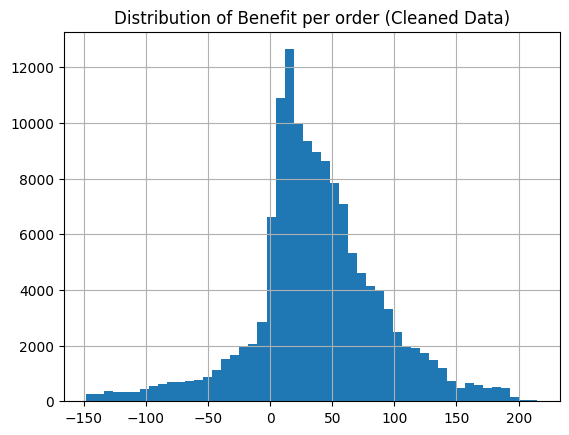

In [ ]:
# visualize data to understand distribution
import matplotlib.pyplot as plt

# Create histogram to visualize the distribution
Data['Benefit per order'].hist(bins=50)
plt.title('Distribution of Benefit per order (Cleaned Data)')
plt.show()

<ipython-input-25-7cd42310e101>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Data.hist(bins=50, ax=ax)


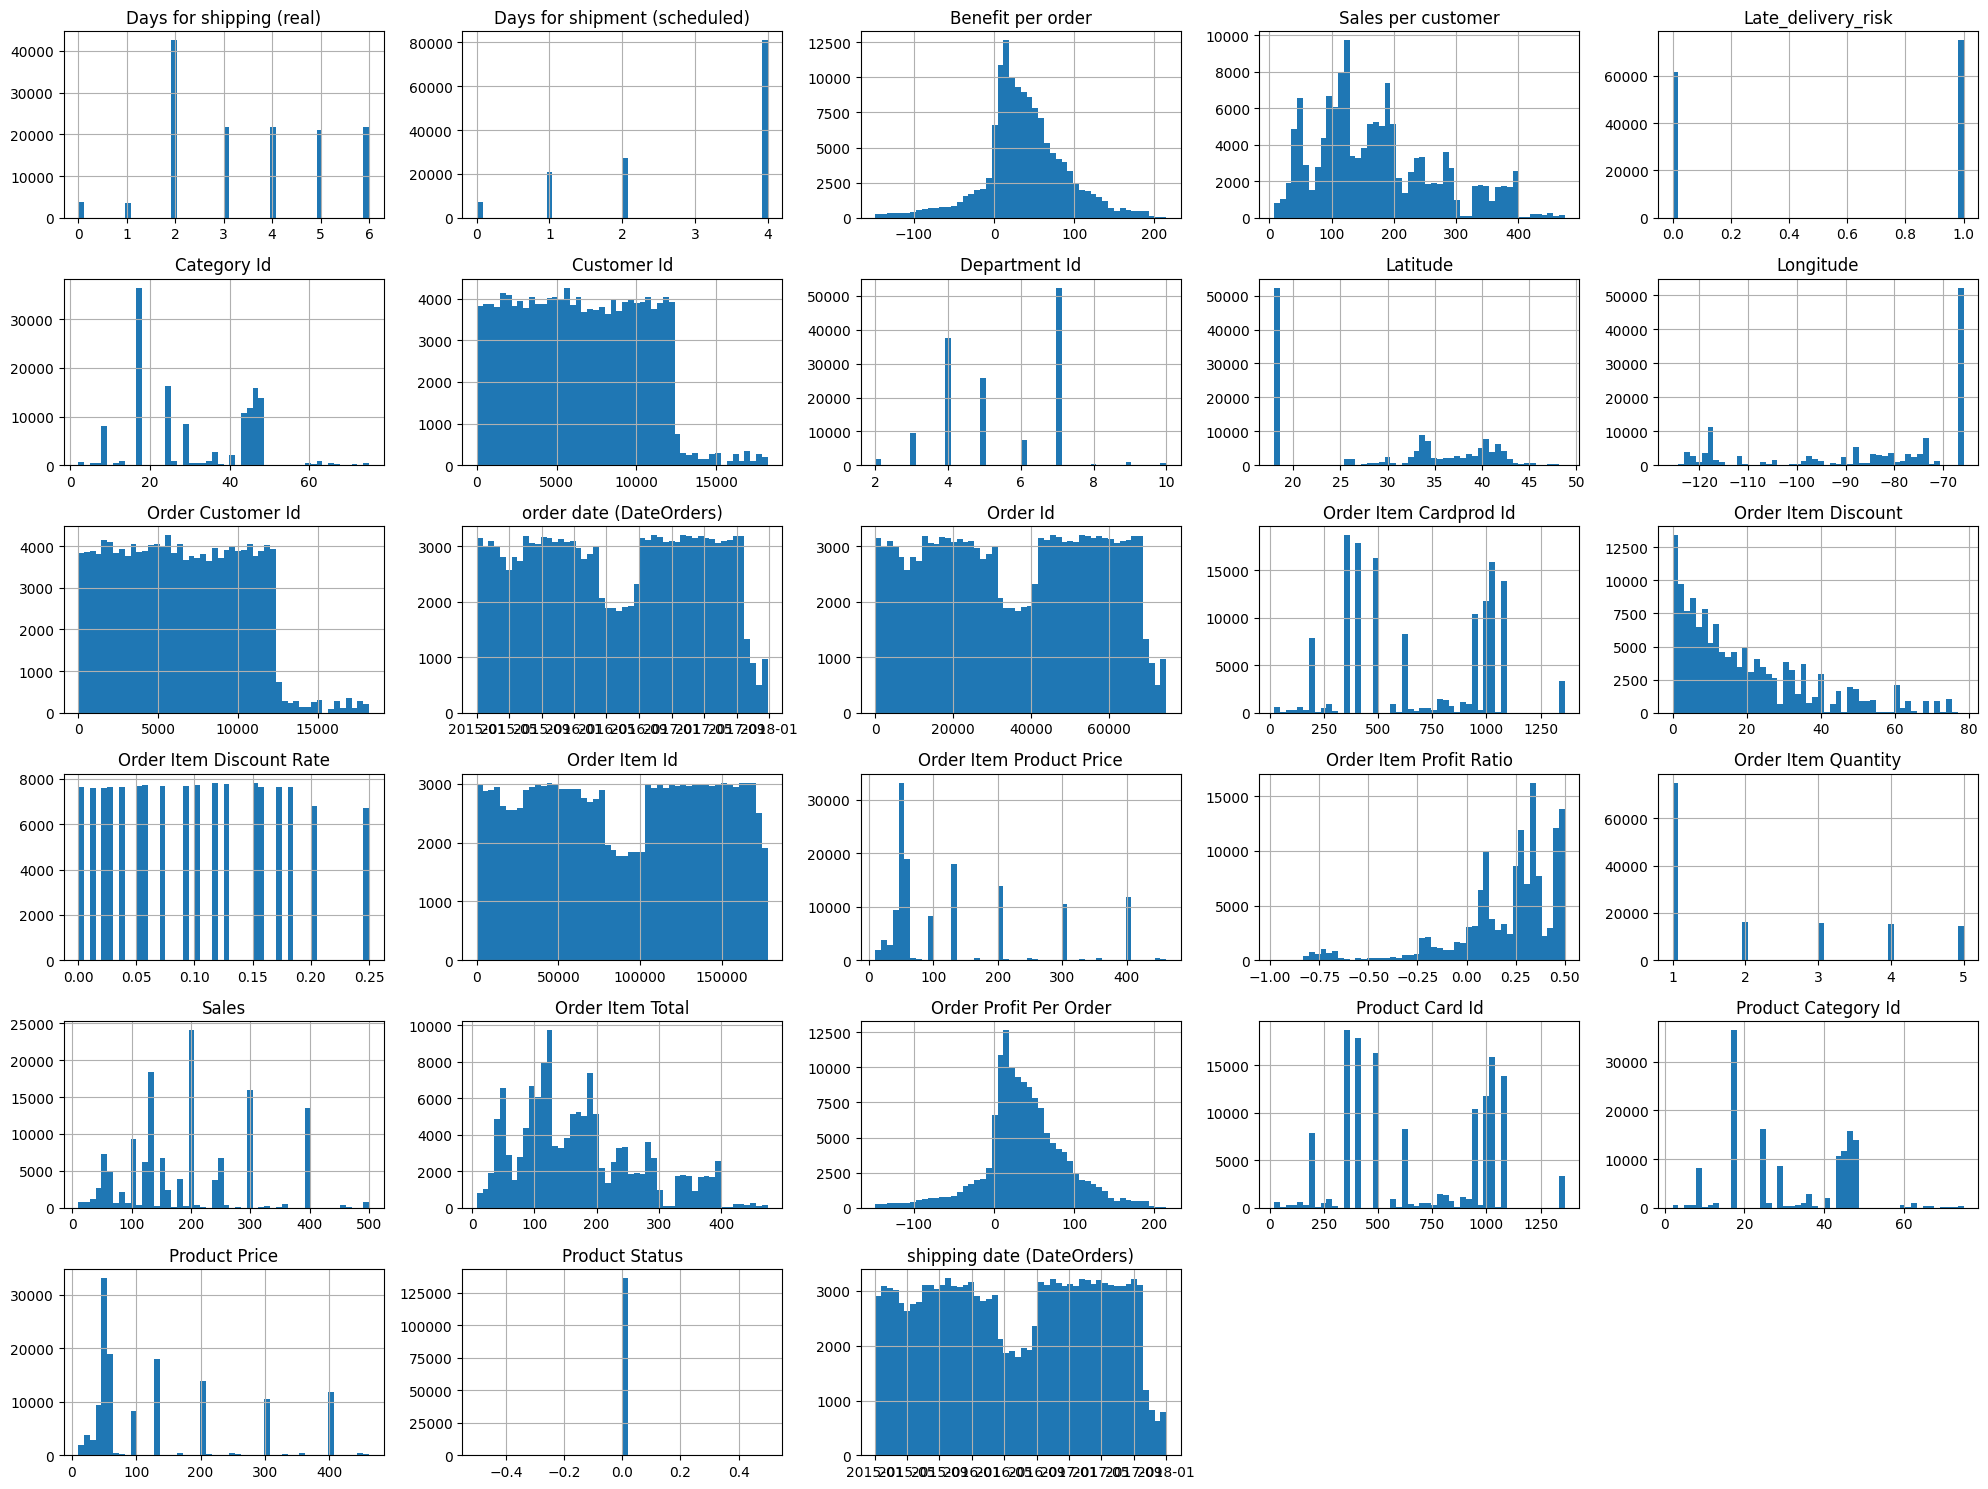

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

# Create histogram to visualize the distribution of each column
Data.hist(bins=50, ax=ax)

# Adjust layout to prevent overlap and rotate x-axis labels
plt.tight_layout()
plt.xticks(rotation=45)

# Rotate the x-axis labels for better readability
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data Cleaning and Feature Selection:**

We cleaned the data by removing unnecessary columns, handling missing values, outliers, converting data types, and ensuring normalization. Selected relevant features for stockout prediction:'Days for shipping (real)', 'Late_delivery_risk', 'Sales per customer,' and 'Benefit per order. This

# Custom Gym Environment for Stockout Mitigation Using Reinforcement Learning

In [ ]:
import gym
from gym import spaces
import numpy as np
from collections import defaultdict

class InventoryManagementEnv(gym.Env):
    def __init__(self, Data):
        super(InventoryManagementEnv, self).__init__()
        self.Data = Data
        self.current_step = 0
        self.inventory = 500  # Lower starting inventory
        self.max_inventory = 2000
        self.restock_amounts = [0, 500, 1000, 2000]
        self.shipping_cost = {'standard': 5, 'expedited': 15}
        self.stockout_penalty = -200
        self.holding_cost_rate = -0.2  # Reduced holding cost rate
        self.sale_profit = 40
        self.late_delivery_penalty = -30

        # Cumulative reward tracking
        self.cumulative_rewards = defaultdict(lambda: {'total_reward': 0, 'count': 0})

        # Updated action space
        self.action_space = spaces.MultiDiscrete([4, 2])  # Corrected for 4 restock options
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32
        )

        # Action counts for debugging
        self.action_counts = {i: 0 for i in range(len(self.restock_amounts))}

    def reset(self):
        self.current_step = 0
        self.inventory = 500  # Lower starting inventory
        self.cumulative_rewards = defaultdict(lambda: {'total_reward': 0, 'count': 0})
        self.action_counts = {i: 0 for i in range(len(self.restock_amounts))}  # Reset action counts
        return self._get_observation()

    def step(self, action):
        # Extract actions
        restock_action, shipping_action = action
        self.action_counts[restock_action] += 1  # Track action usage

        # Update inventory
        restock_amount = self.restock_amounts[restock_action]
        self.inventory = min(self.inventory + restock_amount, self.max_inventory)

        # Extract current data
        current_row = self.Data.iloc[self.current_step]
        demand = current_row['Sales per customer']
        late_risk = current_row['Late_delivery_risk']
        shipping_days_real = current_row['Days for shipping (real)']
        shipping_days_scheduled = current_row['Days for shipment (scheduled)']

        # Calculate individual reward components
        fulfilled_demand = min(self.inventory, demand)
        self.inventory -= fulfilled_demand

        revenue = fulfilled_demand * self.sale_profit
        holding_cost = self.inventory * self.holding_cost_rate
        stockout_cost = self.stockout_penalty if fulfilled_demand < demand else 0
        shipping_cost = self.shipping_cost['expedited'] if shipping_action == 1 else self.shipping_cost['standard']
        late_penalty = self.late_delivery_penalty * late_risk if shipping_days_real > shipping_days_scheduled else 0

        # Calculate total reward
        total_reward = revenue + holding_cost + stockout_cost - shipping_cost + late_penalty

        # Track cumulative rewards for each action
        action_type = f"Restock: {restock_action}, Shipping: {shipping_action}"
        if action_type not in self.cumulative_rewards:
            print(f"Initializing cumulative rewards for {action_type}")  # Debugging
        self.cumulative_rewards[action_type]['total_reward'] += total_reward
        self.cumulative_rewards[action_type]['count'] += 1

        # Debugging cumulative rewards
        print(f"Updated cumulative rewards for {action_type}: {self.cumulative_rewards[action_type]}")

        # Store reward components (optional for logging)
        reward_components = {
            'revenue': revenue,
            'holding_cost': holding_cost,
            'stockout_cost': stockout_cost,
            'shipping_cost': -shipping_cost,  # Negative because it's a cost
            'late_penalty': late_penalty
        }

        # Advance to next step
        self.current_step += 1
        done = self.current_step >= len(self.Data)

        return self._get_observation(), total_reward, done, reward_components

    def _get_observation(self):
        if self.current_step < len(self.Data):
            current_row = self.Data.iloc[self.current_step]
            return np.array([
                self.inventory,
                current_row['Sales per customer'],
                current_row['Days for shipping (real)'],
                current_row['Days for shipment (scheduled)'],
                current_row['Late_delivery_risk'],
                current_row['Benefit per order']
            ], dtype=np.float32)
        else:
            return np.zeros(6, dtype=np.float32)

    def render(self, mode='human', verbosity=1):
        if verbosity == 0:
            print(f"Step: {self.current_step}, Inventory Level: {self.inventory}")
        elif verbosity == 1:
            if self.current_step < len(self.Data):
                current_row = self.Data.iloc[self.current_step]
                print(f"Step: {self.current_step}")
                print(f"Inventory Level: {self.inventory}")
                print(f"Sales per Customer: {current_row['Sales per customer']}")
                print(f"Days for Shipping (Real): {current_row['Days for shipping (real)']}")
                print(f"Days for Shipment (Scheduled): {current_row['Days for shipment (scheduled)']}")
                print(f"Late Delivery Risk: {current_row['Late_delivery_risk']}")
                print(f"Benefit per Order: {current_row['Benefit per order']}")
                print("-" * 30)
            else:
                print(f"Step: {self.current_step} is out of bounds for the DataFrame.")

    def get_average_rewards(self):
        """Calculate and return average rewards for each action type."""
        averages = {}
        for action_type, data in self.cumulative_rewards.items():
            if data['count'] > 0:
                averages[action_type] = data['total_reward'] / data['count']
            else:
                averages[action_type] = 0
            # Debug average reward calculation
            print(f"Action: {action_type}, Total Reward: {data['total_reward']}, Count: {data['count']}, Average: {averages[action_type]:.2f}")
        return averages


Now that your custom environment is functioning correctly, the next step is to develop and train a Deep Q-Network (DQN) agent to interact with it. Here's a structured approach to guide you through this process. A DQN agent utilizes a neural network to approximate the Q-value function, which predicts the expected reward for each action in a given state

In [ ]:
env = InventoryManagementEnv(Data)

# Reset the environment
initial_state = env.reset()
print(f"Initial state: {initial_state}")

# Take a sample action
action = env.action_space.sample()
next_state, reward, done, _ = env.step(action)
print(f"Next state: {next_state}, Reward: {reward}, Done: {done}")

# Render the current state
env.render()

Initial state: [500.   115.18   5.     2.     1.   -30.75]
Initializing cumulative rewards for Restock: 1, Shipping: 1
Updated cumulative rewards for Restock: 1, Shipping: 1: {'total_reward': 4385.236012060001, 'count': 1}
Next state: [884.82  96.     6.     2.     1.    33.6 ], Reward: 4385.236012060001, Done: False
Step: 1
Inventory Level: 884.8199997
Sales per Customer: 96.0
Days for Shipping (Real): 6
Days for Shipment (Scheduled): 2
Late Delivery Risk: 1
Benefit per Order: 33.59999847
------------------------------


# Create DQN Agent

In [ ]:
!pip install torch torchvision torchaudio
!pip install gym

# Train DQN agent

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque

class DQNAgent:
    def __init__(self, state_size, action_sizes):
        self.state_size = state_size
        self.action_sizes = action_sizes  # List of action sizes for each dimension
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0   # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.models = self._build_models()

    def _build_models(self):
        # Create a separate model for each action dimension
        models = []
        for action_size in self.action_sizes:
            model = nn.Sequential(
                nn.Linear(self.state_size, 24),
                nn.ReLU(),
                nn.Linear(24, 24),
                nn.ReLU(),
                nn.Linear(24, action_size)
            )
            models.append(model)
        return models

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            # Return a random action for each dimension
            return [random.randrange(size) for size in self.action_sizes]
        state = torch.FloatTensor(state).unsqueeze(0)
        actions = []
        for model in self.models:
            act_values = model(state)
            action = np.argmax(act_values.detach().numpy()[0])
            actions.append(action)
        return actions

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                next_state = torch.FloatTensor(next_state).unsqueeze(0)
                targets = []
                for i, model in enumerate(self.models):
                    q_values = model(next_state).detach().numpy()[0]
                    targets.append(np.max(q_values))
                target = reward + self.gamma * sum(targets) / len(targets)
            state = torch.FloatTensor(state).unsqueeze(0)
            for i, model in enumerate(self.models):
                target_f = model(state).detach().numpy()
                target_f[0][action[i]] = target
                target_f = torch.FloatTensor(target_f)
                model.train()
                criterion = nn.MSELoss()
                optimizer = optim.Adam(model.parameters(), lr=self.learning_rate)
                optimizer.zero_grad()
                outputs = model(state)
                loss = criterion(outputs, target_f)
                loss.backward()
                optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


# Implement

In [ ]:
import torch
import numpy as np

# Create an instance of the DQNAgent
state_size = env.observation_space.shape[0]
action_sizes = list(env.action_space.nvec)  # Get action sizes from nvec
agent = DQNAgent(state_size, action_sizes)

# Set the agent to evaluation mode
agent.epsilon = 0.0  # Disable exploration

# Reset the environment
state = env.reset()
state = np.reshape(state, [1, state_size])
done = False
total_reward = 0

# Initialize a dictionary to accumulate reward components
reward_components_accumulated = {
    'revenue': 0,
    'holding_cost': 0,
    'stockout_cost': 0,
    'shipping_cost': 0,
    'late_penalty': 0
}

# Variables to track the step with the highest reward
max_step_reward = float('-inf')
max_step_index = -1
max_step_components = {}

step_index = 0

# Run the agent until the episode ends
while not done:
    # Agent selects an action
    action = agent.act(state)

    # Environment responds to the action
    next_state, reward, done, reward_components = env.step(action)

    # Accumulate the total reward
    total_reward += reward

    # Accumulate each reward component
    for key in reward_components_accumulated:
        reward_components_accumulated[key] += reward_components.get(key, 0)

    # Check if this step has the highest reward so far
    if reward > max_step_reward:
        max_step_reward = reward
        max_step_index = step_index
        max_step_components = reward_components.copy()

    # Print step details
    print(f"Step: {step_index}")
    print(f"Inventory Level: {next_state[0]:.1f}")
    print(f"Sales per Customer: {next_state[1]:.2f}")
    print(f"Days for Shipping (Real): {int(next_state[2])}")
    print(f"Days for Shipment (Scheduled): {int(next_state[3])}")
    print(f"Late Delivery Risk: {int(next_state[4])}")
    print(f"Benefit per Order: {next_state[5]:.2f}")
    print("-" * 30)

    # Prepare the next state
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state

    step_index += 1

# Output the total reward obtained
print(f"Total reward: {total_reward}")

# Output the breakdown of accumulated reward components
print("Accumulated reward components:")
for key, value in reward_components_accumulated.items():
    print(f"{key}: {value}")

# Output the step with the highest reward
print(f"\nStep with the highest reward: {max_step_index}")
print(f"  Total Reward: {max_step_reward}")
for key, value in max_step_components.items():
    print(f"  {key}: {value}")

# Get and print the average rewards per action type
average_rewards = env.get_average_rewards()
print("\nAverage Rewards per Action Type:")
for action, avg in average_rewards.items():
    print(f"{action}: {avg:.2f}")


Streaming output truncated to the last 5000 lines.
Days for Shipping (Real): 6
Days for Shipment (Scheduled): 4
Late Delivery Risk: 1
Benefit per Order: 124.49
------------------------------
Updated cumulative rewards for Restock: 3, Shipping: 0: {'total_reward': 30338078.548629586, 'count': 3550}
Step: 136027
Inventory Level: 1751.0
Sales per Customer: 245.98
Days for Shipping (Real): 2
Days for Shipment (Scheduled): 4
Late Delivery Risk: 0
Benefit per Order: 108.23
------------------------------
Updated cumulative rewards for Restock: 0, Shipping: 1: {'total_reward': 686043919.2434855, 'count': 124749}
Step: 136028
Inventory Level: 1505.0
Sales per Customer: 327.98
Days for Shipping (Real): 6
Days for Shipment (Scheduled): 4
Late Delivery Risk: 1
Benefit per Order: 95.12
------------------------------
Updated cumulative rewards for Restock: 0, Shipping: 1: {'total_reward': 686056758.0319259, 'count': 124750}
Step: 136029
Inventory Level: 1177.1
Sales per Customer: 239.98
Days for Shi

# Analysis

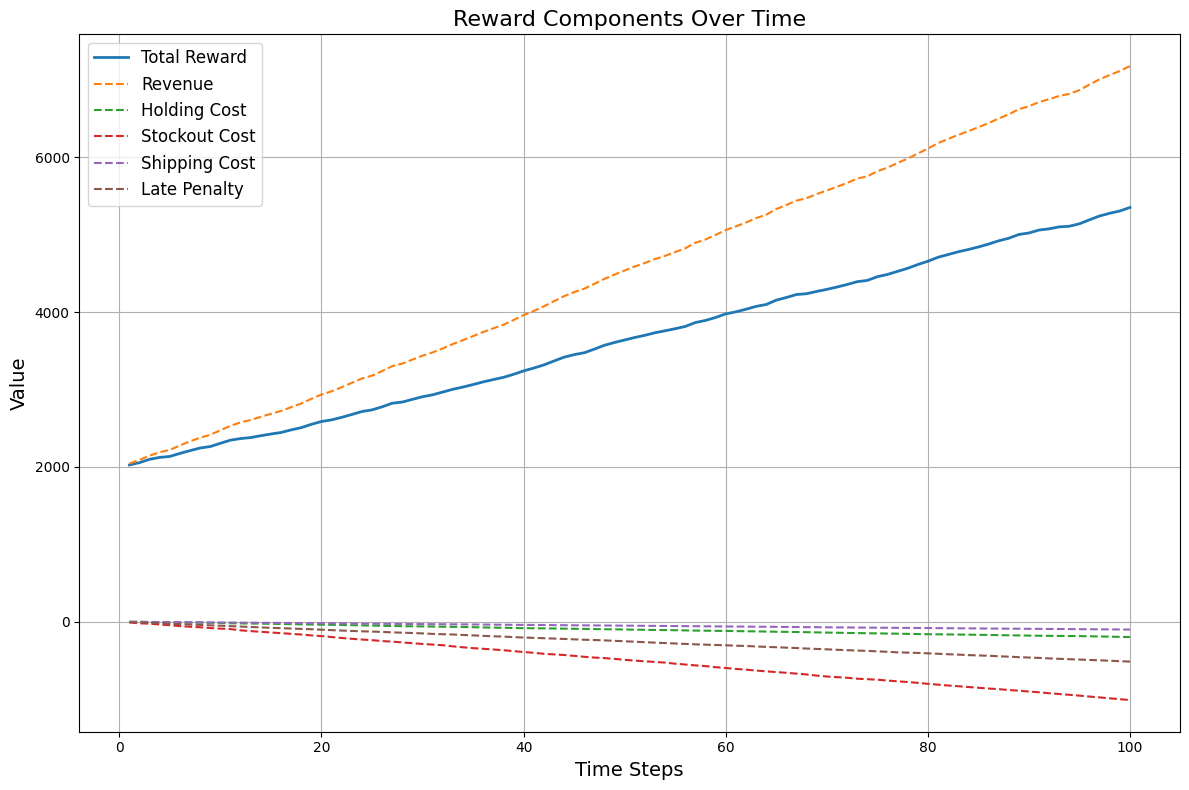

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
plt.plot(time_steps, total_reward_over_time, label='Total Reward', linewidth=2)
plt.plot(time_steps, revenue_over_time, label='Revenue', linestyle='--')
plt.plot(time_steps, holding_cost_over_time, label='Holding Cost', linestyle='--')
plt.plot(time_steps, stockout_cost_over_time, label='Stockout Cost', linestyle='--')
plt.plot(time_steps, shipping_cost_over_time, label='Shipping Cost', linestyle='--')
plt.plot(time_steps, late_penalty_over_time, label='Late Penalty', linestyle='--')

plt.title('Reward Components Over Time', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Trends of Total Reward and Its Components Over Time: The chart illustrates the cumulative performance of total reward and its contributing factors, including revenue, holding costs, stockout costs, shipping costs, and late penalties. While revenue drives the overall increase in rewards, negative costs like stockouts and late penalties highlight areas for potential operational improvement.


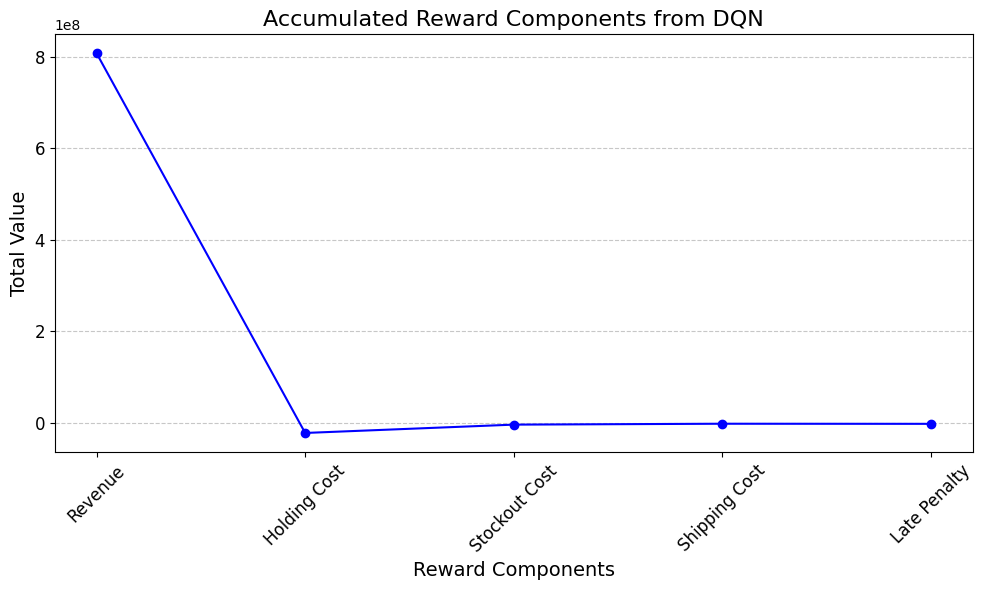

In [ ]:
import matplotlib.pyplot as plt

# DQN results data
dqn_results = {
    "Total Reward": 777528216.544008,
    "Accumulated Rewards": {
        "Revenue": 807952825.828724,
        "Holding Cost": -22191644.284390982,
        "Stockout Cost": -3969600,
        "Shipping Cost": -2013005,
        "Late Penalty": -2250360,
    },
    "Step with Highest Reward": {
        "Step": 3631,
        "Total Reward": 18977.990490440003,
        "Revenue": 18998.000488,
        "Holding Cost": -5.0099975599999995,
        "Stockout Cost": 0,
        "Shipping Cost": -15,
        "Late Penalty": 0,
    },
    "Average Rewards per Action Type": {
        "Restock: 1, Shipping: 1": 10272.91,
    },
}

# Data for line graph
accumulated_rewards = dqn_results["Accumulated Rewards"]

# Plot: Accumulated Reward Components (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(
    accumulated_rewards.keys(),
    accumulated_rewards.values(),
    marker='o',
    linestyle='-',
    color='blue'
)
plt.title("Accumulated Reward Components from DQN", fontsize=16)
plt.ylabel("Total Value", fontsize=14)
plt.xlabel("Reward Components", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The model successfully maximized revenue while avoiding stockouts, which is necessary for profitability. Another strength is the model was well-controlled in balancing shipping and late penalties, suggesting efficient restocking. However, the model ensured inventory demands were met, resulting in sufficient holding costs.

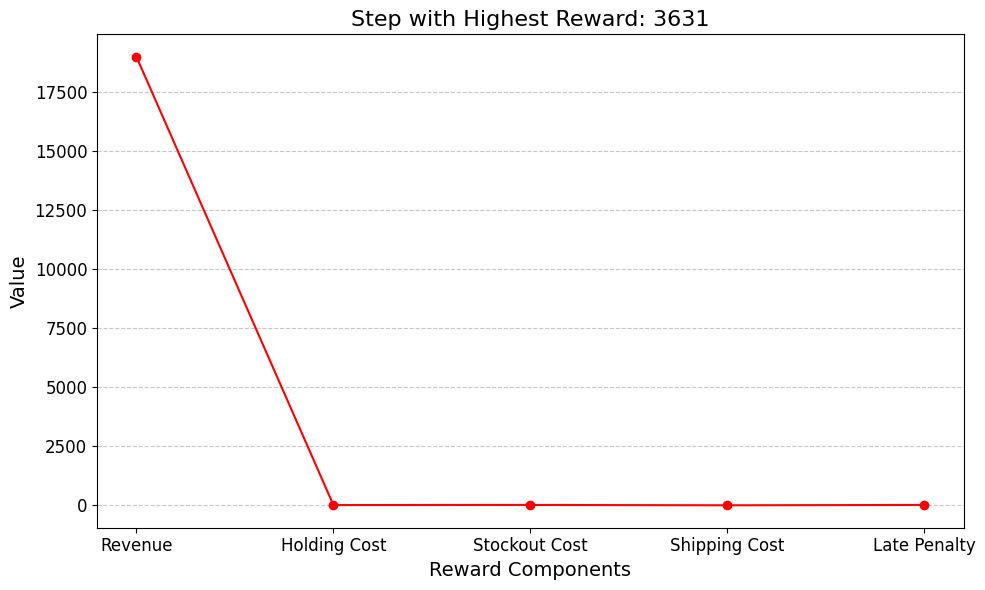

In [ ]:
# Data for line graph
step_highest_reward = dqn_results["Step with Highest Reward"]
step_keys = ["Revenue", "Holding Cost", "Stockout Cost", "Shipping Cost", "Late Penalty"]
step_values = [step_highest_reward[key] for key in step_keys]

# Plot: Step with the Highest Reward (Line Graph)
plt.figure(figsize=(10, 6))
plt.plot(
    step_keys,
    step_values,
    marker='o',
    linestyle='-',
    color='red'
)
plt.title(f"Step with Highest Reward: {step_highest_reward['Step']}", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.xlabel("Reward Components", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



This chart shows the breakdown of total contributions to the overall reward, like the other plot. Revenue is the largest positive contributor, which means the model is successfully maximizing sales. A noticeable difference from the previous plot is that the holding cost is significantly minimized. This suggests the inventory levels were well-managed and avoid excessive overstocking while meeting demands.


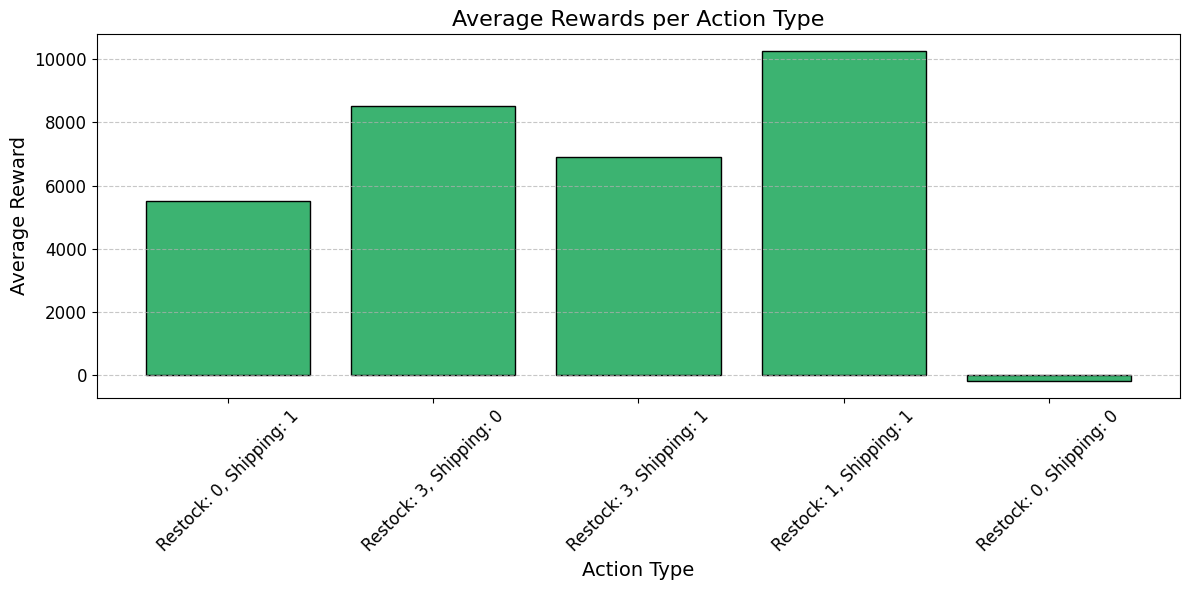

In [ ]:
import matplotlib.pyplot as plt

# Average Rewards per Action Type
average_rewards = {
    "Restock: 0, Shipping: 1": 5494.24,
    "Restock: 3, Shipping: 0": 8536.52,
    "Restock: 3, Shipping: 1": 6901.04,
    "Restock: 1, Shipping: 1": 10272.91,
    "Restock: 0, Shipping: 0": -205.00,
}

# Extract keys and values
actions = list(average_rewards.keys())
rewards = list(average_rewards.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(actions, rewards, color="mediumseagreen", edgecolor="black")
plt.title("Average Rewards per Action Type", fontsize=16)
plt.ylabel("Average Reward", fontsize=14)
plt.xlabel("Action Type", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


This code will generate the bar chart, reflecting the average rewards for each restocking and shipping action type. The visualization shows the combination of restocking 1 (500 units) and shipping 1 (expedited shipping) outperforms the other combinations. No restocking and standard shipping were more likely to result in stockout.  

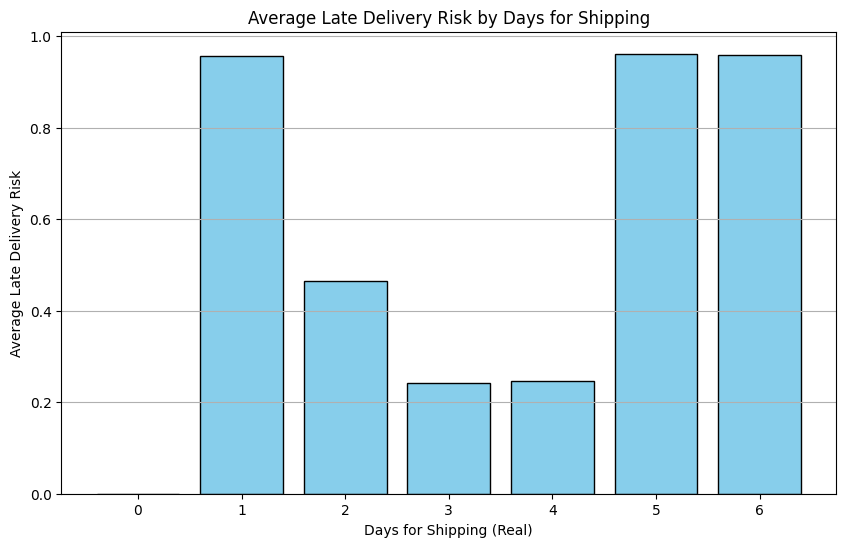

In [ ]:
# Aggregate the average late delivery risk by days for shipping
aggregated_data = Data.groupby('Days for shipping (real)')['Late_delivery_risk'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data.index, aggregated_data.values, color='skyblue', edgecolor='black')
plt.title('Average Late Delivery Risk by Days for Shipping')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Average Late Delivery Risk')
plt.grid(axis='y')
plt.show()

This visualization provides critical evidence that shipping duration and late delivery risk are strongly linked. Reliable durations (e.g., 3–4 days) are less likely to face delays, indicating predictable shipping outcomes.
Problematic durations (e.g., 1, 5, and 6 days) are prone to delays and late delivery risks.




# Conclusion:

By adopting Deep Reinforcement Learning (DRL), we successfully identified actionable insights to optimize operations and enhance decision-making across multiple dimensions:

1. Increasing Profits and Reducing Costs: The DRL model highlighted associations between actions such as restocking levels and shipping priorities, revealing strategies to maximize revenue while minimizing costs related to stockouts, shipping, and late delivery penalties. Proving the reward equation is true and effective.

2. Predicting Inventory Demand: Through its interactions with the environment, the DRL model effectively learned to anticipate demand patterns, enabling better inventory management. This reduces stockouts while balancing costs, improving overall efficiency and customer satisfaction.

3. Forecasting Shipping Duration: We found certain shipping durations are more prone to delays, and their associated risks can be identified using other models, such as linear regression and decision trees.